<a href="https://colab.research.google.com/github/het1752/machine-learning/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data set contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/WineQT.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
data['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

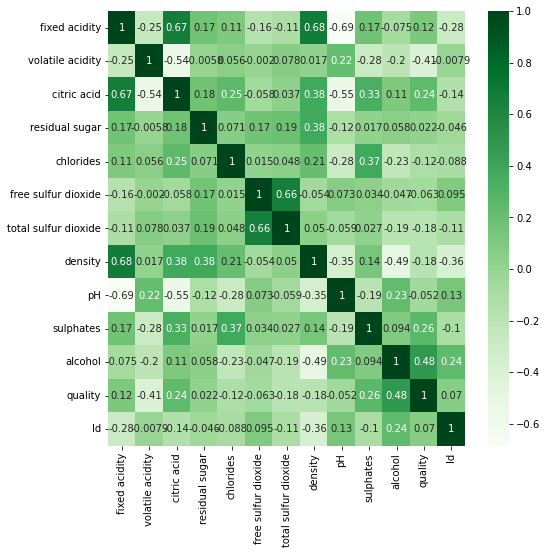

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='Greens')

In [ ]:
data.quality.unique

<bound method Series.unique of 0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64>

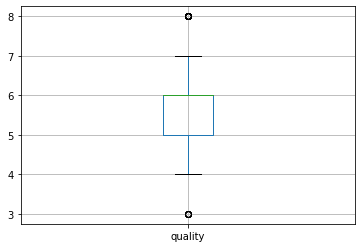

In [ ]:
data[['quality']].boxplot()

In [ ]:
x=data.drop('quality',axis=1)
y=data.quality

In [ ]:
len(x),len(y)

(1143, 1143)

In [ ]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4


In [ ]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(914, 914, 229, 229)

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_y1=model1.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_y1)

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  2,  1,  0],
       [ 2,  5, 62, 25,  2,  0],
       [ 2,  0, 32, 48, 17,  0],
       [ 0,  0,  0,  7, 19,  0],
       [ 0,  0,  0,  0,  2,  0]])

In [ ]:
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y1,average='weighted'))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y1,average='weighted'))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y1,average='weighted'))

Precision: 0.5807860262008734
recall: 0.5676855895196506
f1_score: 0.5687971875525506


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Randomforest
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)
pred_y2=model2.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y2))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y2,average='weighted'))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y2,average='weighted'))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y2,average='weighted'))

[[ 0  3  3  0  0]
 [ 0 75 21  0  0]
 [ 0 27 66  6  0]
 [ 0  0 10 16  0]
 [ 0  0  2  0  0]]
Precision: 0.6617438559385643
recall: 0.6855895196506551
f1_score: 0.6724456321015012


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
#gausiian naive bias classifier
model3 = GaussianNB()
model3.fit(x_train,y_train)
pred_y3=model3.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y3))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y3,average='weighted'))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y3,average='weighted'))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y3,average='weighted'))

[[ 0  0  0  0  0  0]
 [ 0  0  3  3  0  0]
 [ 2  3 54 35  2  0]
 [ 0  4 10 68 15  2]
 [ 0  0  2  8 16  0]
 [ 0  0  0  1  1  0]]
Precision: 0.6371391237337921
recall: 0.6026200873362445
f1_score: 0.6096895989235702


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#multinomial naive bias classifier
model4 = MultinomialNB()
model4.fit(x_train,y_train)
pred_y4=model4.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y4))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y4,average='weighted'))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y4,average='weighted'))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y4,average='weighted'))

[[ 0  0  0  0  0  0]
 [ 3  0  3  0  0  0]
 [21  2 56 11  5  1]
 [29  2 37 23  7  1]
 [ 7  1 11  3  4  0]
 [ 1  0  0  0  1  0]]
Precision: 0.5148523067841471
recall: 0.3624454148471616
f1_score: 0.3986376448093972


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#bernuli naive bias classifier
model5 = BernoulliNB()
model5.fit(x_train,y_train)
pred_y5=model5.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y5))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y5,average='weighted'))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y5,average='weighted'))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y5,average='weighted'))

[[ 0  6  0  0  0]
 [ 0 96  0  0  0]
 [ 0 99  0  0  0]
 [ 0 26  0  0  0]
 [ 0  2  0  0  0]]
Precision: 0.17574035582845482
recall: 0.4192139737991266
f1_score: 0.2476587168290225


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 **So Randomforest classifier has best accuracy compare to above all models**